Claim related fraud is a huge problem in the insurance industry so here I am using a automobile iundustry insurance dataset and trying to perform a comparative study to determine the most suitable machine learning algorithm for building a predictive model that can classify automobile insurance claims as either fraudulent or legitimate. 

I'm working to solve this issue and support the general insurance sector. Predicting whether a claim is fraudulent (yes) or not fraudulent (no) is a binary classification task.

# 1.Importing the libraries

In [137]:
import pandas as pd
import numpy as np
import statsmodels
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, \
                                    GridSearchCV, RandomizedSearchCV
from pylab import rcParams
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
                            f1_score, roc_curve, roc_auc_score
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from scikitplot.metrics import plot_cumulative_gain as pcg
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import optuna


# 2. Importing the Data

In [75]:
df = pd.read_csv("D:\\Praxis_DataScience_JAN-SEPT\\Projects\\insurance_claims.csv")

# 3. Overall view of the dataset

In [76]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Displaying non-numerical feature

In [77]:
df.select_dtypes(exclude="number").head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


### Displaying shape, columns name and information of the columns

In [78]:
print('dataframe has {} rows & {} columns' .format(df.shape[0], df.shape[1]))

dataframe has 1000 rows & 39 columns


In [79]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### We can see that incident_date's data type is object but we know that this is a date. So changing the data type of incident_date

In [81]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date                       object
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

# 4. Setting display options to ensure feature name visibility

In [82]:
pd.set_option('display.max_columns',None)

# 5. Warning Suppression

In [83]:
import warnings
warnings.filterwarnings('ignore')

# 6. Performing a basic EDA to understand the data and also to find out what all pre-processing is required before modelling.

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


### Trying to look into the statistical summary of categorical datapoints.

In [85]:
df.describe(exclude='number').T

,count,unique,top,freq,first,last
policy_bind_date,1000,951,2006-01-01,3,NaT,NaT
policy_state,1000,3,OH,352,NaT,NaT
policy_csl,1000,3,250/500,351,NaT,NaT
insured_sex,1000,2,FEMALE,537,NaT,NaT
insured_education_level,1000,7,JD,161,NaT,NaT
insured_occupation,1000,14,machine-op-inspct,93,NaT,NaT
insured_hobbies,1000,20,reading,64,NaT,NaT
insured_relationship,1000,6,own-child,183,NaT,NaT
incident_date,1000,60,2015-02-02 00:00:00,28,2015-01-01,2015-03-01
incident_type,1000,4,Multi-vehicle Collision,419,NaT,NaT


### Describe provides a summary of the features, such as:

1) Count: Count displays how many records there are.

2) Mean: average measurement

3) Standard Deviation: The standard deviation provides information about a feature's variability; typically, a larger standard deviation indicates that the feature's values are dispersed and off the mean, whereas a smaller standard deviation indicates that the data points are more tightly clustered.

4) Minimum: The feature's lowest value

5) Maximum: The maximum value denotes the feature's highest value.

6) 25% of the total falls under Q1.

7) Middle 50% of the variable, 50% | Median.

8) 75% | Q3: 75% of the value is below Q3.

### Non-Numerical Features:

In [86]:
non_numeric_col = df.select_dtypes(exclude=np.number).columns.tolist()

In [87]:
non_numeric_col 

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

### Numerical Features:

In [88]:
numeric_col =df.select_dtypes(include=np.number).columns.tolist()
numeric_col

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

### Dividing two data frames one for fraudulent claims and the other for non-fraudulent claims

#### Fraudulent claim dataframe

In [89]:
fraud_claim=df[df['fraud_reported'] == 'Y']

In [90]:
fraud_claim

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,1998-12-28,OH,250/500,2000,1301.13,0,476685,FEMALE,College,machine-op-inspct,board-games,not-in-family,41300,-55500,2015-01-15,Single Vehicle Collision,Rear Collision,Total Loss,Police,SC,Springfield,6851 3rd Drive,12,1,NO,0,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,1990-05-16,IN,100/300,500,951.56,0,455426,FEMALE,JD,transport-moving,video-games,wife,59400,-78600,2015-02-08,Multi-vehicle Collision,Side Collision,Major Damage,Police,SC,Riverwood,3884 Pine Lane,3,3,NO,2,1,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y
977,266,42,929306,2003-03-06,IN,100/300,500,1093.83,4000000,468454,MALE,Associate,adm-clerical,board-games,other-relative,0,-49600,2015-02-21,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,WV,Springfield,4937 Flute Drive,18,3,?,1,1,NO,53280,4440,8880,39960,Suburu,Impreza,2015,Y
982,230,43,490514,2007-02-09,IN,500/1000,2000,1101.83,0,451529,MALE,High School,exec-managerial,cross-fit,other-relative,28900,0,2015-01-01,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Arlington,7511 1st Ave,0,3,?,0,3,YES,51900,5190,10380,36330,BMW,M5,2011,Y
986,232,42,182953,2013-04-30,IN,100/300,500,944.03,0,440153,MALE,College,handlers-cleaners,kayaking,not-in-family,0,-58400,2015-02-19,Single Vehicle Collision,Rear Collision,Minor Damage,Other,WV,Riverwood,8269 Sky Hwy,11,1,YES,2,3,?,77000,15400,7700,53900,Toyota,Highlander,2015,Y


#### Non-fraudulent claim

In [91]:
non_fraud_claim=df[df['fraud_reported'] == 'N']

In [92]:
non_fraud_claim

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


### Checking for Duplicate

There are no duplicate values in our data set.

In [93]:
df.duplicated().sum()

0

### Checking null values 

There are no null values in our data set.

In [94]:
df.isna()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [95]:
df.isnull().sum(axis=0)

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Trying to find the count of number of fraud vs number of not fraud

In [96]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

### Visualisation of the target variable

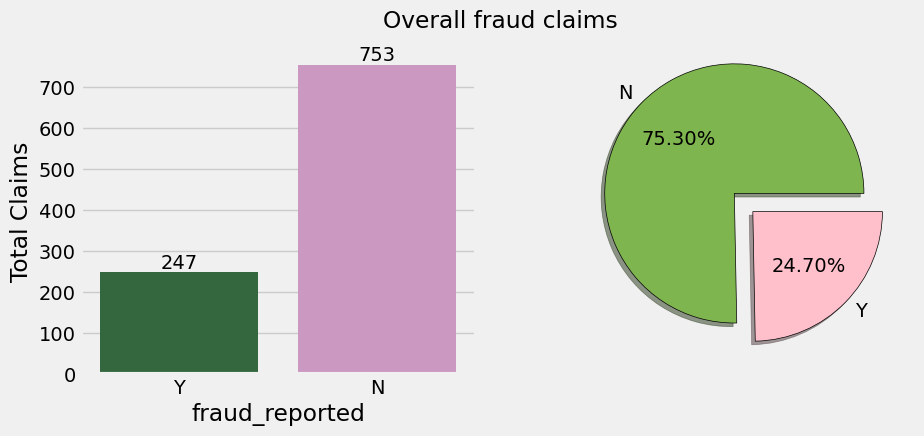

In [97]:
plt.figure(figsize=(10,4))
c = ['#7eb54e','pink']
ax1 = plt.subplot(1,2,1)
sns.countplot(data=df, x='fraud_reported', ax=ax1, palette='cubehelix');
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_ylabel('Total Claims')

ax2 = plt.subplot(1,2,2)
df['fraud_reported'].value_counts().plot(kind='pie', autopct='%0.2f%%', explode=[0.2,0], shadow=True, 
                                     figsize=(10,4), colors=c, wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.suptitle('Overall fraud claims');

#### From the count it can be understood that the data set is an imabalanced data set, Out of 1000 claims, 25% of claims are reported to be fraudulent claims and rest 75% are non-fraudent claims.

### Finding out the count of the incident state

In [98]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

### Plotting fraud reported by incident_state

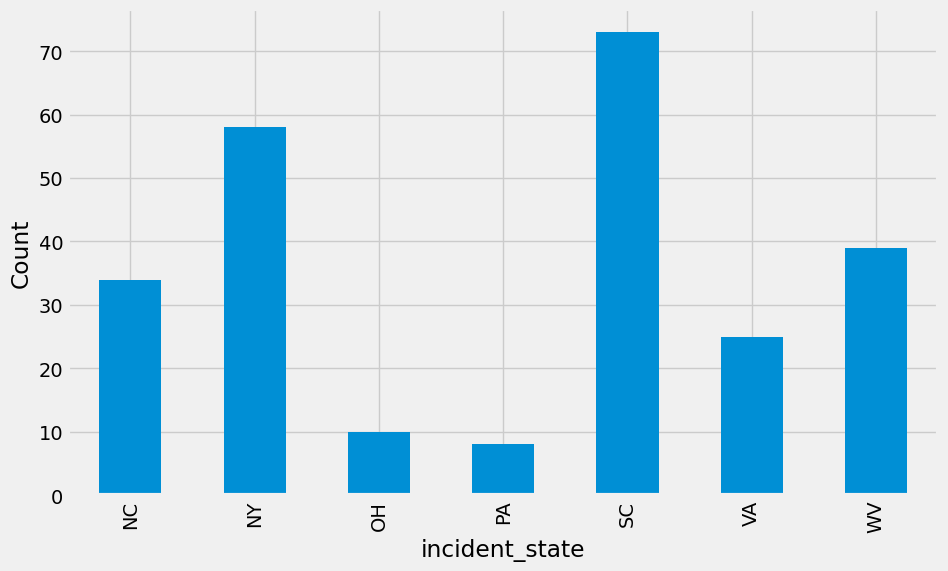

In [99]:
fig = plt.figure(figsize=(10,6))
ax = fraud_claim.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Count')
plt.show()

#### Maximum number of fraud claim is from incident state 'SC'

### Ploting all the numeric features on a histogram

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

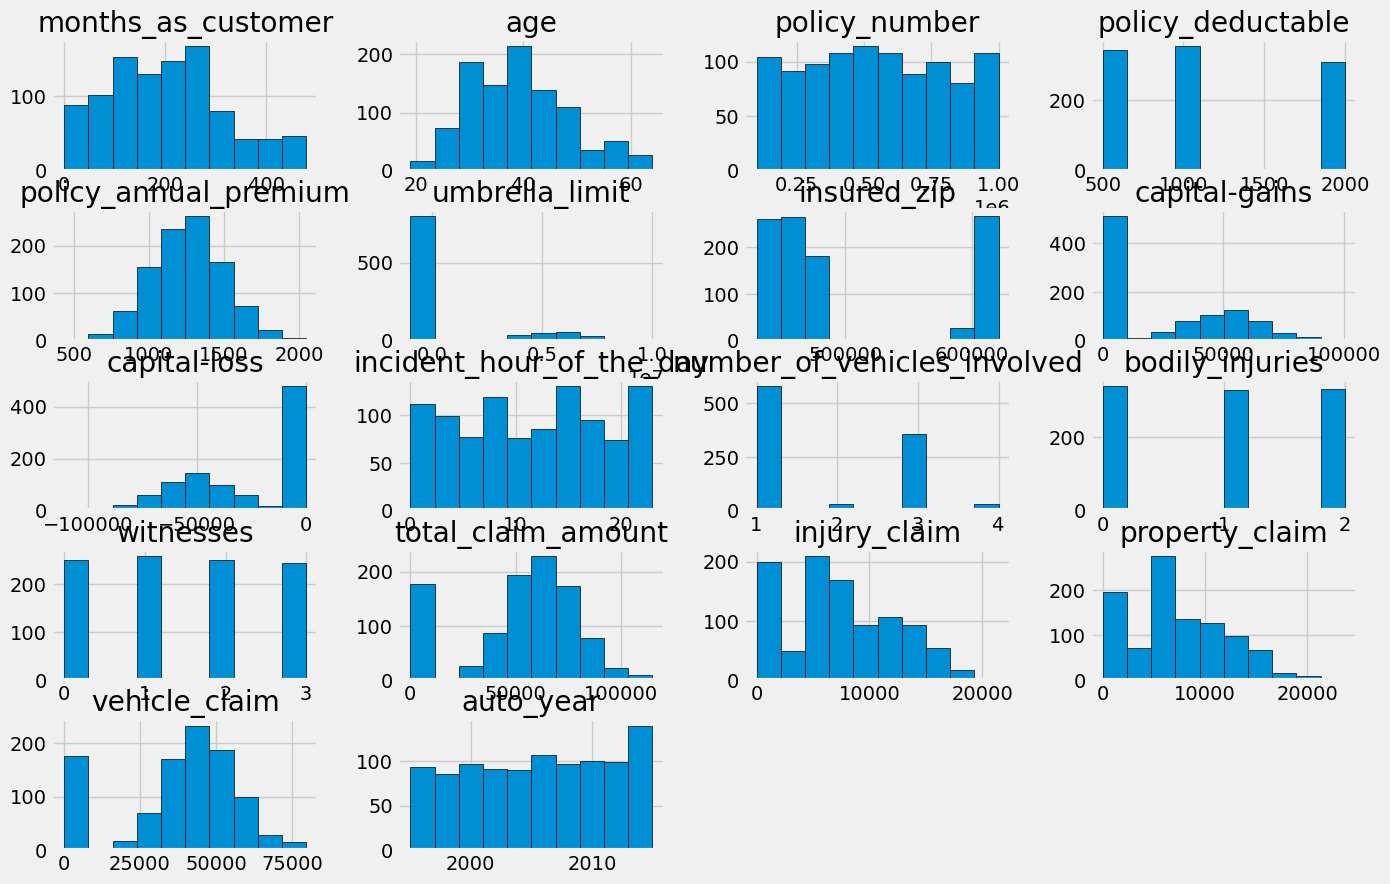

In [100]:
df.hist(numeric_col,figsize=(15,10),edgecolor='black')


### Checking Umbrella limit's distribution

#### Excess liability insurance is another name for umbrella insurance. An umbrella policy assists in covering costs if a policyholder is sued for losses that exceed the liability limits of their auto insurance, house insurance, or other types of coverage. The amount of the umbrella insurance policy should match the entire net worth of the person.

In [101]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [102]:
Umblimit=df[df['umbrella_limit'] >0]

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

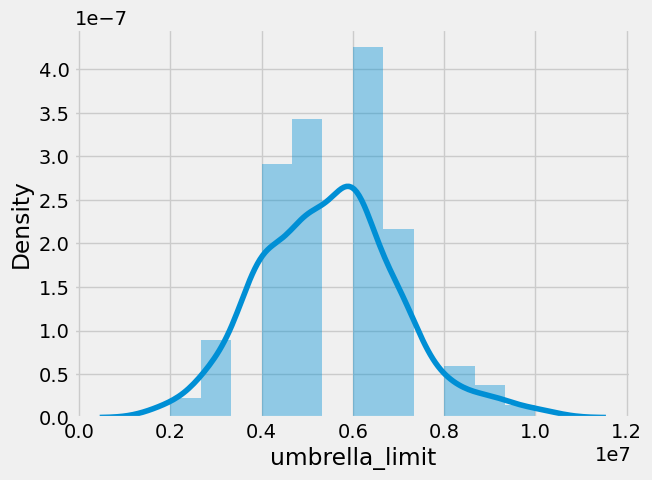

In [103]:
sns.distplot(Umblimit['umbrella_limit'])

#### The umbrella limit greater than zero has a normal distribution.

### Plotting Claim amount by incident date to check the month and year when the maximum claim was made:

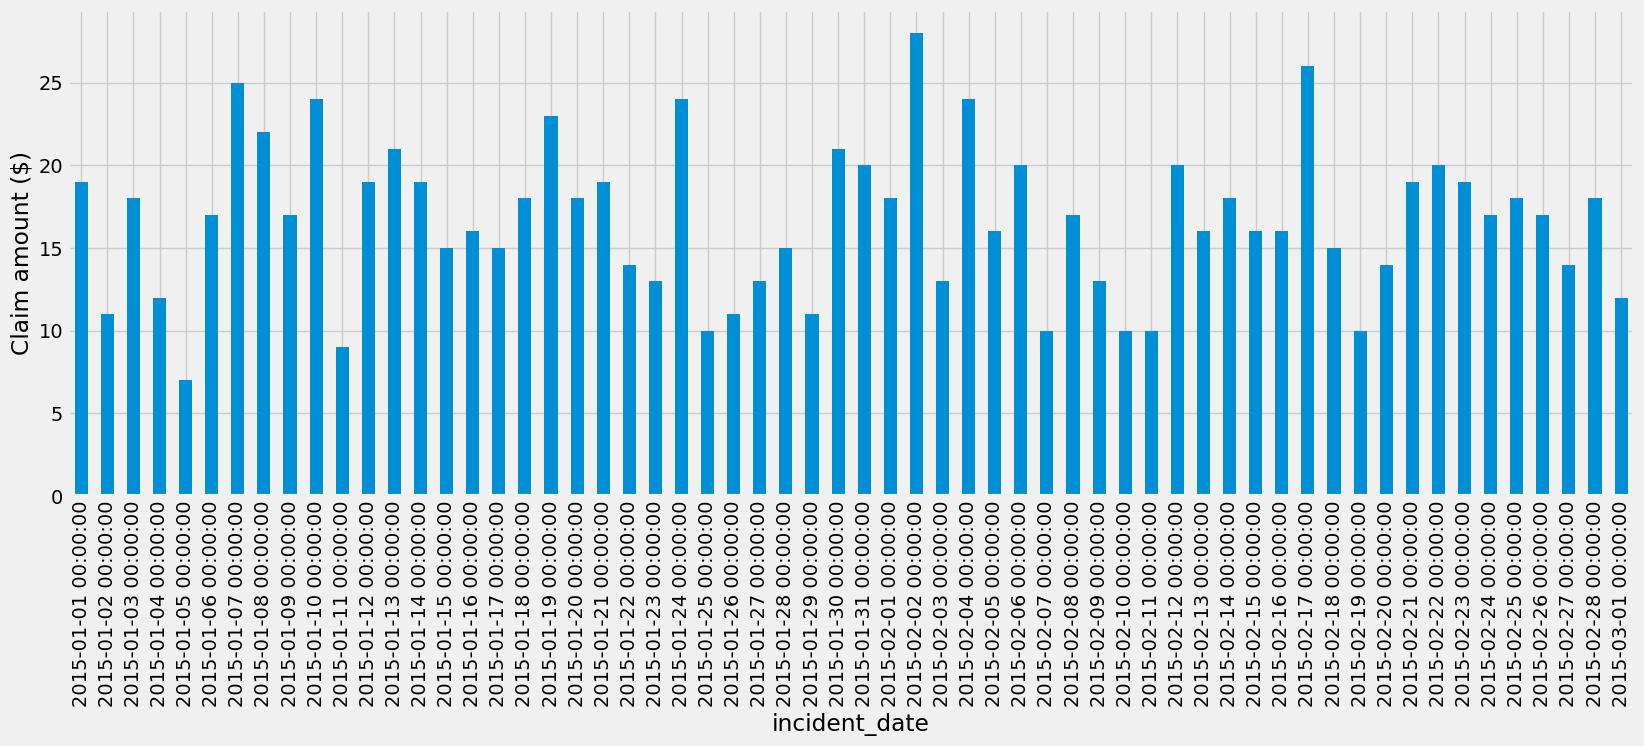

In [104]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

#### We can see that all of the cases in the plot above are from January and February of 2015.

### Number of total claims policy_state wise is given below:

In [105]:
df.groupby('policy_state').fraud_reported.count()

policy_state
IL    338
IN    310
OH    352
Name: fraud_reported, dtype: int64

### Number of fraudulent claims policy_state wise is given below:

In [106]:
fraud_claim.groupby('policy_state').fraud_reported.count()

policy_state
IL    77
IN    79
OH    91
Name: fraud_reported, dtype: int64

### Number of non-fraudulent claims policy_state wise is given below:

In [107]:
non_fraud_claim.groupby('policy_state').fraud_reported.count()

policy_state
IL    261
IN    231
OH    261
Name: fraud_reported, dtype: int64

### To check from which policy state the maximum number of responses have been recorded be it a fraud or a non-fraud claim. 

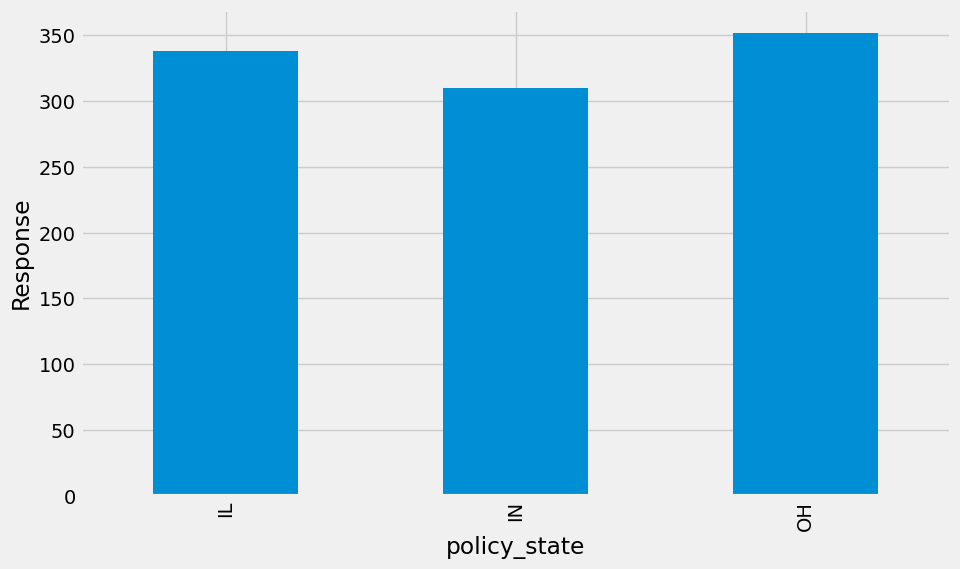

In [108]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Response')
plt.show()

#### From the above plot, it has been observed that the maximum number of responses, be it fraud claims or not, have been recorded from the policy state of "OHIO".

### To check which type of incident has lead to  the maximum number of responses(Fraud or Non Fraud reported)

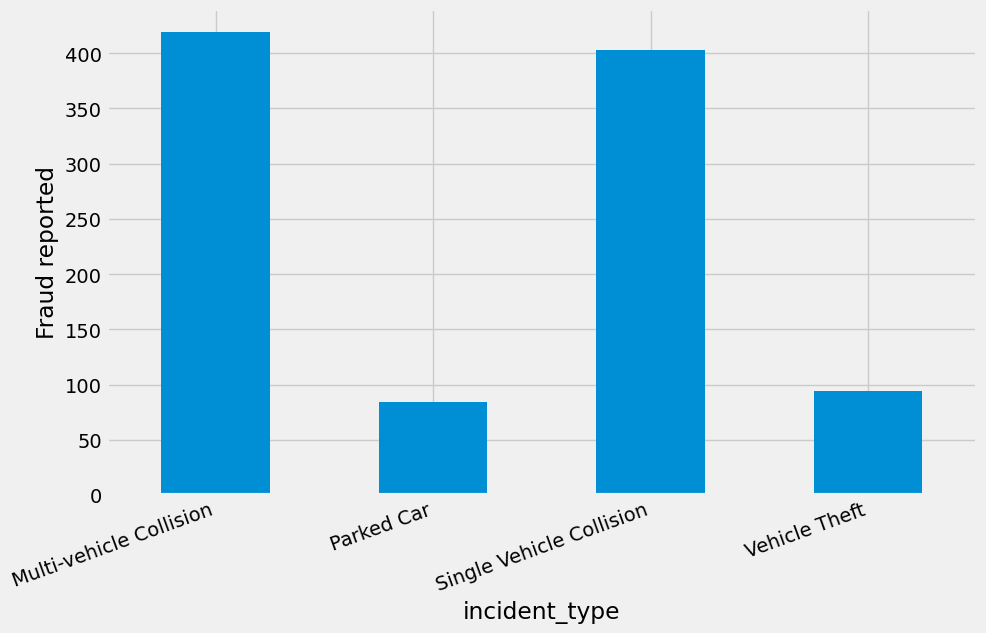

In [109]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

#### Multi-vehicle collision has lead to maximum number of responses, then comes single vehicle collision, vehicle theft and at the last parked car.

### To check from which incident state the maximum number of responses have been recorded be it a fraud or a non-fraud claim. 

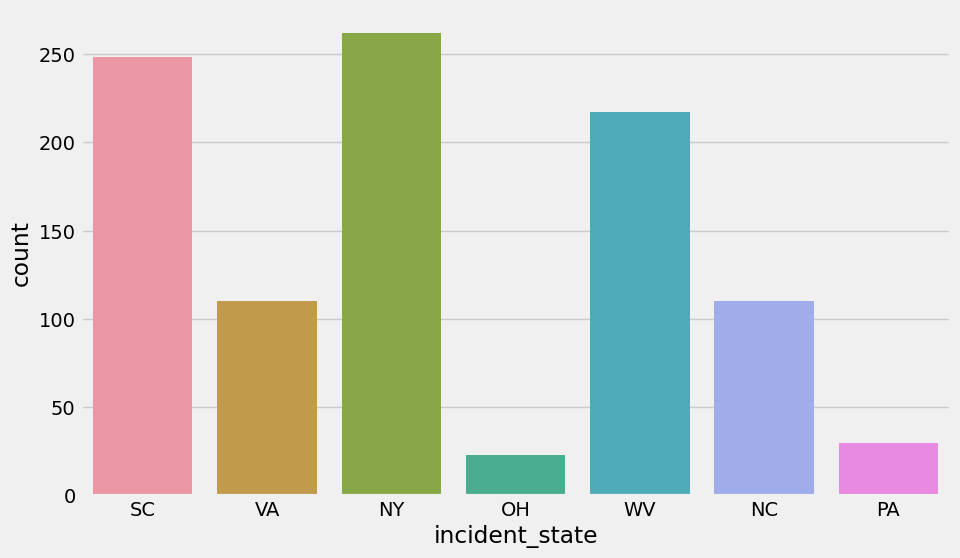

In [110]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

#### From the above plot, it has been observed that the maximum number of responses, be it fraud claims or not, have been recorded from the incident state of "New-York".

### Trying to find out if there is any pattern of fraud being reported with the customer age.

<AxesSubplot:xlabel='age', ylabel='count'>

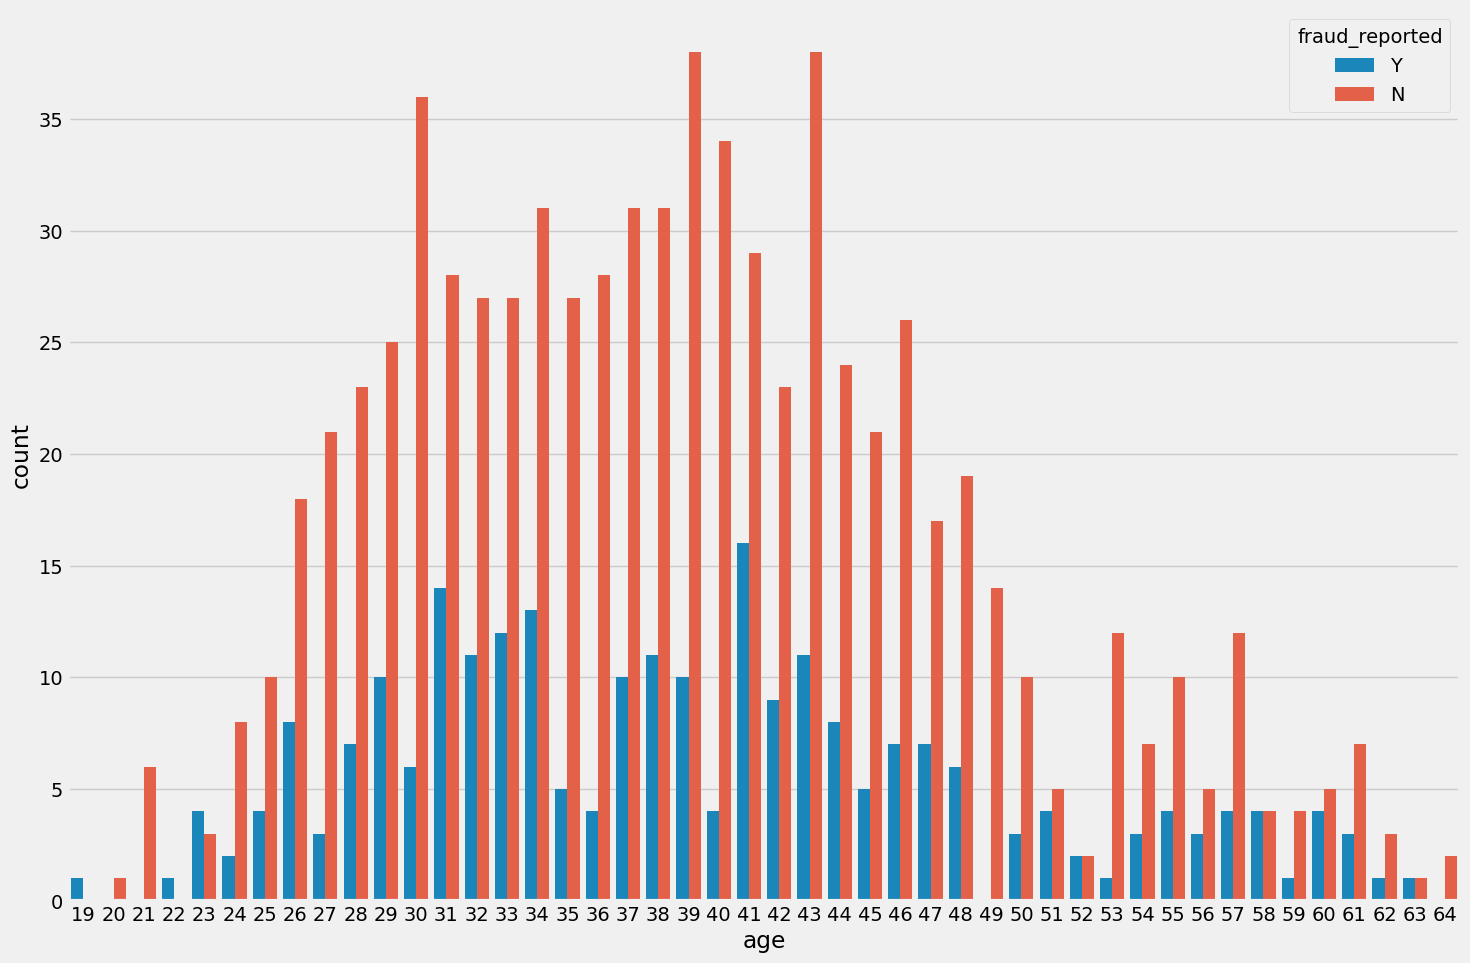

In [111]:
plt.figure(figsize=(16,11))
sns.countplot(x='age',hue='fraud_reported',data=df)

#### This plot follows a normal distribution and the pattern that can be observed from this plot is within the age 26-47 there is a high number of fraud being recorded(it can be fraudulent transaction or not a fraudulent transaction).

### Getting the count of age wise fraudulent or non fraudulent transaction

In [112]:
age_wise_fraudreported = df['fraud_reported'].groupby([df['age'], df['fraud_reported']]).agg(['count']).to_dict()
extracted_dict_awfraudreport = {**age_wise_fraudreported['count']}
final_dict = extracted_dict_awfraudreport.copy()
keys_to_delete = [19, 20, 21, 22, 23, 24, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]

for key in extracted_dict_awfraudreport.keys():
    if key[0] in keys_to_delete:
        del final_dict[key]
df_final = pd.DataFrame(list(final_dict.items()), columns=['Age', 'Count'])
df_final.insert(1, 'Fraud', [x[1] for x in df_final['Age']])
df_final['Age'] = [x[0] for x in df_final['Age']]
df_final['Fraud'] = df_final['Fraud'].replace({'N': 'No', 'Y': 'Yes'})
df_fraud=df_final.sort_values(by=['Count'], ascending=False)
df_fraud


,Age,Fraud,Count
36,43,No,38
28,39,No,38
10,30,No,36
30,40,No,34
26,38,No,31
24,37,No,31
18,34,No,31
32,41,No,29
12,31,No,28
22,36,No,28


#### We can find that maximum number of non fraudulent transaction(38) has been observed with the customer of age 43 and 39 whereas the maximum number of fraudulent transaction has been observed with the customer of age 41. So from the above table we can more clearly see the age wise fraudulent and non-fraudulent transaction made.

### Plotting to check insured customers occupation who have recorded a higher number of fraudulent and non-fraudulent transactions

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

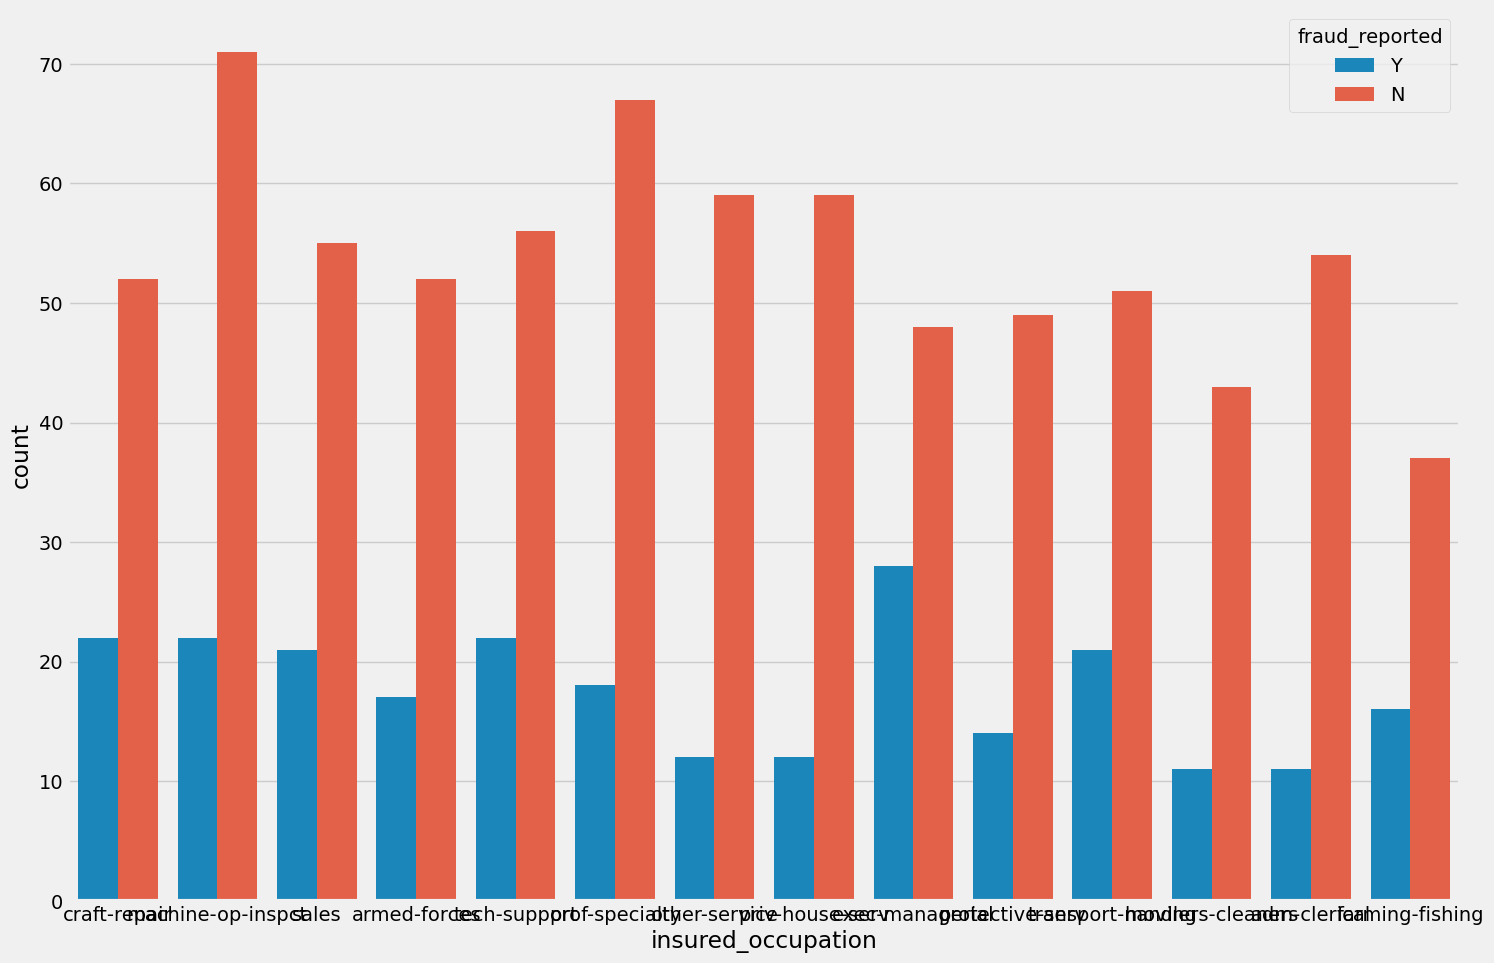

In [113]:
plt.figure(figsize=(16,11))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)

#### The figure above makes it evident that those in executive-managerial level jobs have made the most fraudulent claims and those in machine-operation-inspect level jobs have made the most number of non-fraudulent claims.

### Plotting to check the gender wise fraudulent and non fraudulent claim amount

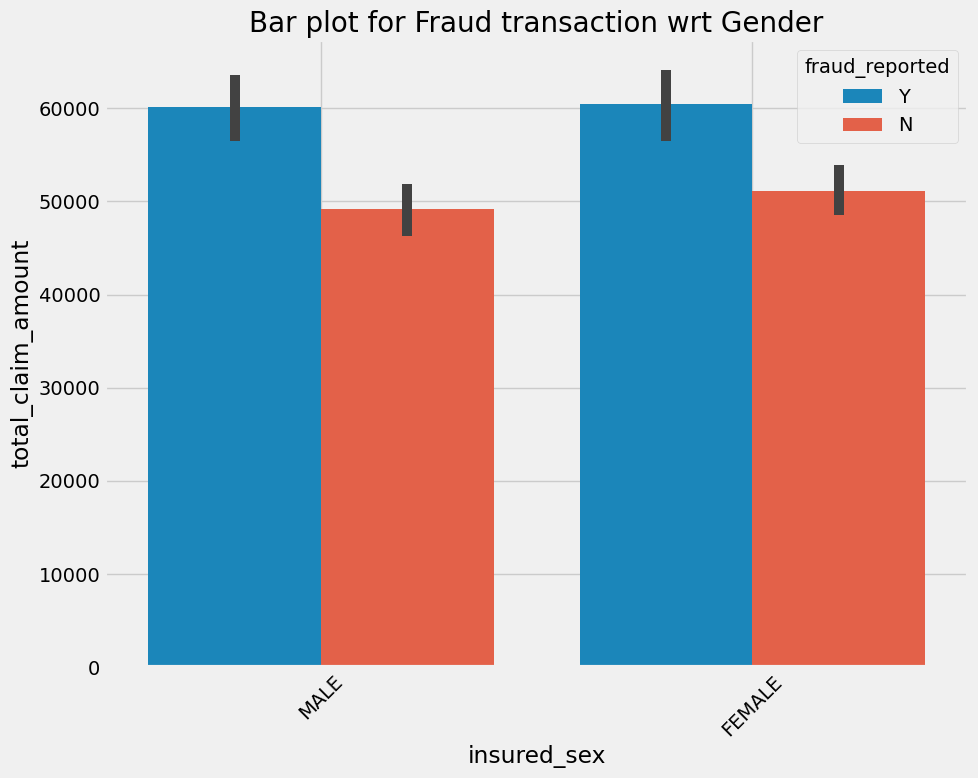

In [114]:
plt.figure(figsize=(10,8))
plt.title("Bar plot for Fraud transaction wrt Gender",fontsize=20)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### It is evident from the plot above that both men and women have made equal amounts of claims transaction that falls under the fraudulent category.

### Which are the car make or type against which vehicle claims has been made

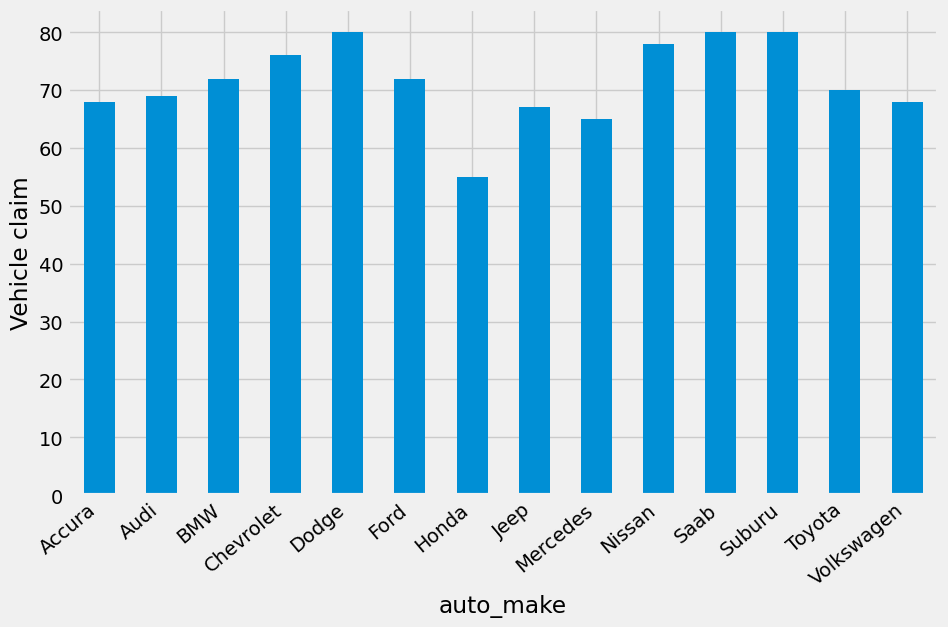

In [115]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### From the above plot it is clear that car make['Dodge','Saab' and 'Suburu'] are the cars type against which maximum claims have been made.

### Which are the car make or type against which fraudulent claims have been made

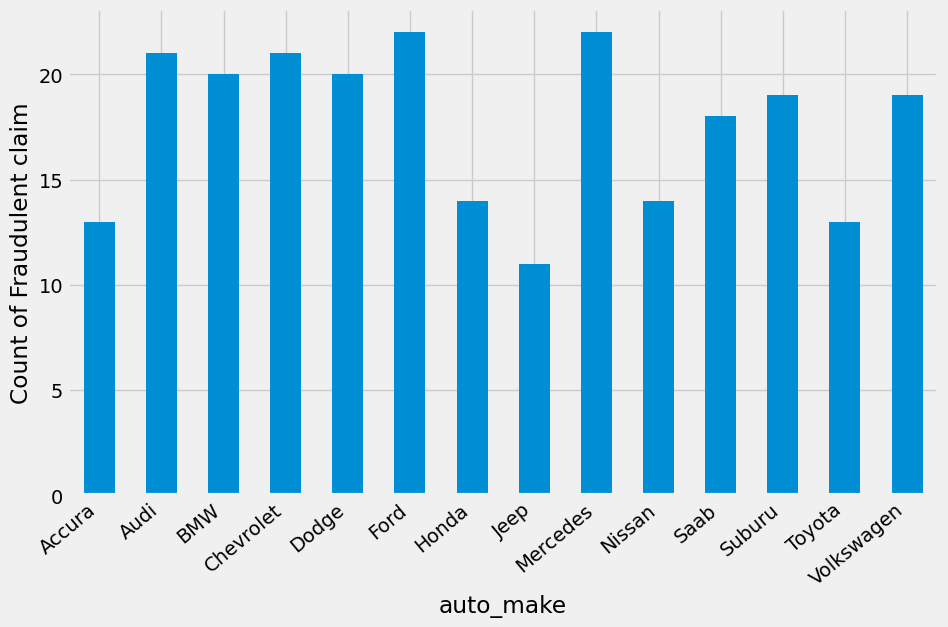

In [116]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= fraud_claim.groupby('auto_make').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Count of Fraudulent claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### From the above plot it is clear that car make['Ford','Mercedes','Audi','Chevrolet'] are the top 4 cars type against which maximum fraudulent claims have been made.

### Plotting to check education wise fraud and non-fraud claim

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

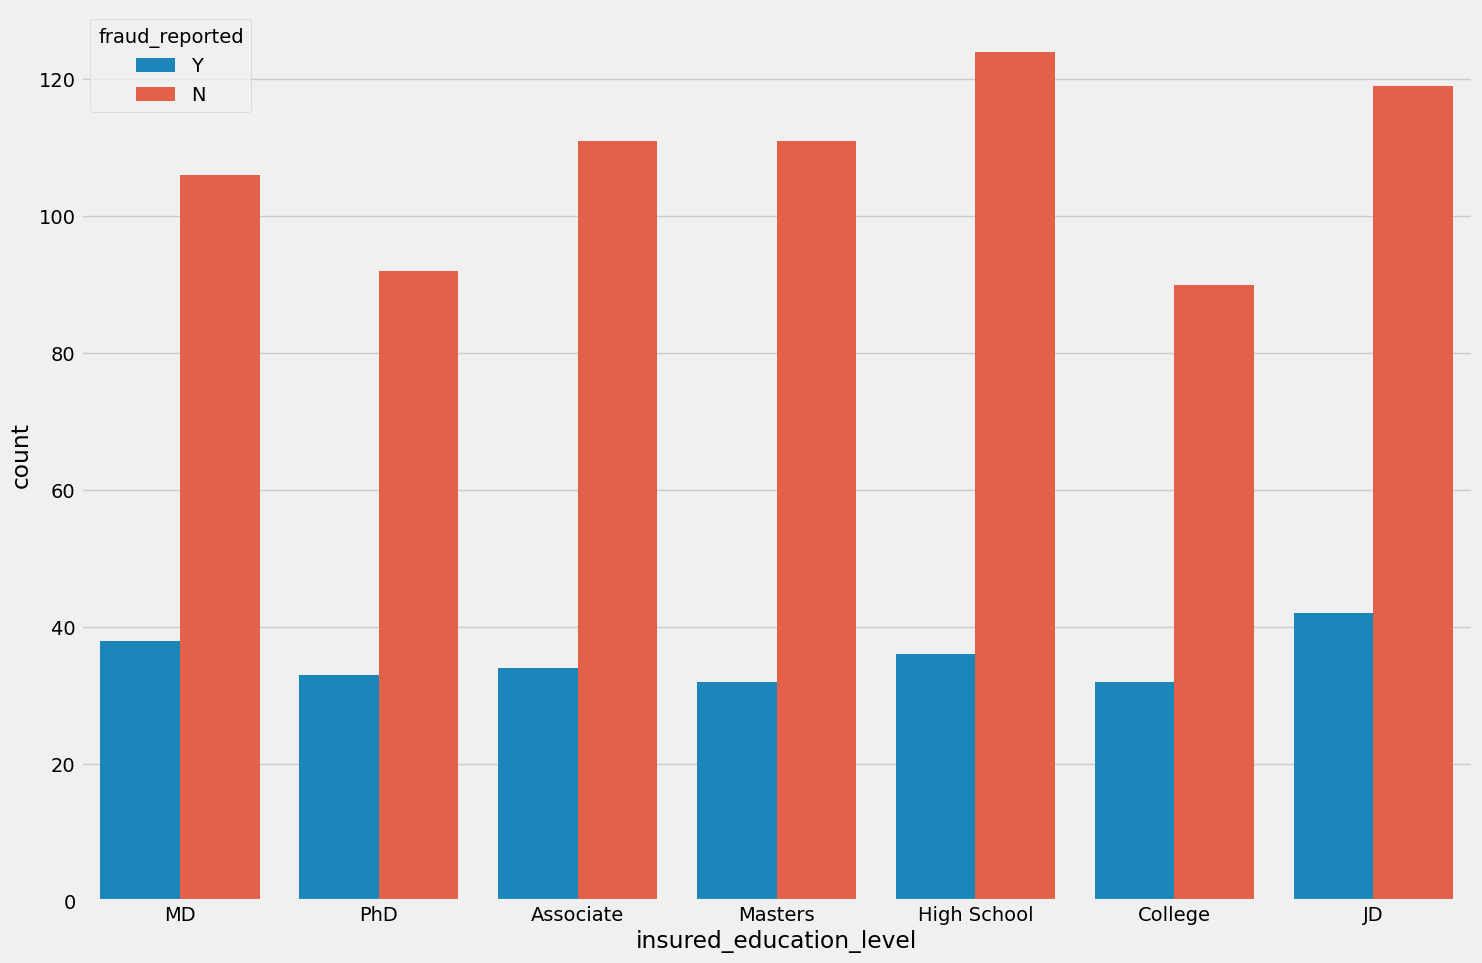

In [117]:
plt.figure(figsize=(16,11))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

#### From the above plot it is clear that people with education level of JD have claimed maximum number of fraudulent claim compared to other education level.

# 7. Data preprocessing or cleaning

### Count of different collision type against which the claim has been raised

In [45]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

#### We can see that ? is under collision type which is an unknown collision type value so we need to replace this with missing

In [46]:
df['collision_type']=df['collision_type'].replace("?","missing")

In [47]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
missing            178
Name: collision_type, dtype: int64

In [48]:
df.isnull().sum().any()

False

#### Checking the number of police record against the fraud and non-fraud claim

In [49]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

#### We can see that ? is under police_report_available which is an unknown police_report_available value so we need to replace this with missing

In [50]:
df['police_report_available']=df['police_report_available'].replace("?","missing")

In [51]:
df['police_report_available'].value_counts()

missing    343
NO         343
YES        314
Name: police_report_available, dtype: int64

### Encoding the 'Y' and 'N' of fraud_reported

In [52]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,missing,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,missing,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,missing,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


### Copying the original dataframe into another data frame

In [53]:
df2=df.copy()

### Dropping column that are not important from intuition and from understanding of the dat set

In [54]:
df2=df2.drop(['policy_number','policy_bind_date','insured_zip',
              'incident_date','authorities_contacted','incident_location',
              'auto_make','auto_model'],axis=1)

### Doing One Hot Encoding

In [55]:
df2=pd.get_dummies(df2,columns=['policy_state','policy_csl','insured_sex',
                                'insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship',
                                'incident_type','collision_type','incident_severity',
                                'incident_state','incident_city',
                                'property_damage','police_report_available'],drop_first=True)

In [56]:
df2['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

#### Class 0 is for non-fraudulent claims and Clas 1 is for fraudulent claim. From the above output we can see that the data set is imbalanced.

In [57]:
df2.isnull().sum()

months_as_customer                 0
age                                0
policy_deductable                  0
policy_annual_premium              0
umbrella_limit                     0
                                  ..
incident_city_Springfield          0
property_damage_NO                 0
property_damage_YES                0
police_report_available_YES        0
police_report_available_missing    0
Length: 90, dtype: int64

# 8. Modeling process

### Splitting the data set for training and testing the model

In [58]:
y = df2['fraud_reported']
x = df2.drop(['fraud_reported'], axis=1)

### We have to do SMOTE over sampling because our data set is imbalanced

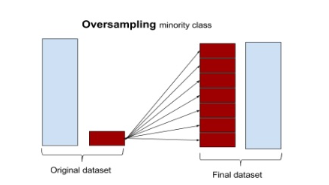

In [59]:
smote = SMOTE(sampling_strategy='not majority', random_state=1234)
x_smote, y_smote = smote.fit_resample(x,y)

In [60]:
print(x_smote.shape)
print(y_smote.shape)

(1506, 89)
(1506,)


### Train-Test Split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=1234)

In [62]:
x_train.shape

(1204, 89)

In [63]:
x_test.shape

(302, 89)

In [64]:
y_train.shape

(1204,)

In [65]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=list(x_train.columns))
x_test = pd.DataFrame(scaler.transform(x_test),columns=list(x_test.columns))

### Logistic Regression Model

In [66]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
train_accuracy = logreg.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9177740863787376


In [67]:
coefficients = logreg.coef_[0]
feature_names = np.arange(x_train.shape[1])

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

dominating_feature = coefficients_df.iloc[0]['Feature']
dominating_coefficient = coefficients_df.iloc[0]['Coefficient']
print("Dominating Feature:", dominating_feature)
print("Dominating Coefficient:", dominating_coefficient)

less_dominating_feature = coefficients_df.iloc[-1]['Feature']
less_dominating_coefficient = coefficients_df.iloc[-1]['Coefficient']
print("Less Dominating Feature:", less_dominating_feature)
print("Less Dominating Coefficient:", less_dominating_coefficient)

    Feature  Coefficient
44       44     2.755000
45       45     2.169721
4         4     0.778473
13       13     0.441523
2         2     0.405204
..      ...          ...
43       43    -1.471625
56       56    -1.622106
72       72    -2.781431
71       71    -2.938684
70       70    -3.046817

[89 rows x 2 columns]
Dominating Feature: 44.0
Dominating Coefficient: 2.7550000827990835
Less Dominating Feature: 70.0
Less Dominating Coefficient: -3.0468166483564243


In [68]:
y_pred_train = logreg.predict(x_train)
clsf_rep_train = classification_report(y_train, y_pred_train)
print("Classification Report of Training Data:")
print(clsf_rep_train)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       606
           1       0.92      0.91      0.92       598

    accuracy                           0.92      1204
   macro avg       0.92      0.92      0.92      1204
weighted avg       0.92      0.92      0.92      1204



In [69]:
y_pred = logreg.predict(x_test)
test_accuracy = logreg.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8708609271523179


In [70]:
y_pred_test = logreg.predict(x_test)
clsf_rep_test = classification_report(y_test, y_pred_test)
print("Classification Report of Training Data:")
print(clsf_rep_test)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       147
           1       0.89      0.86      0.87       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [71]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_score= metrics.f1_score(x,y,average='macro')
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    print('accuracy score is :',accuracy)
    print('F1 score is :',F1_score)
    print('precision score is :',precision)
    print('recall score is :',recall)
    sns.heatmap(cm,annot=True,cmap='Purples',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')


accuracy score is : 0.8708609271523179
F1 score is : 0.870848182466144
precision score is : 0.8866666666666667
recall score is : 0.8580645161290322


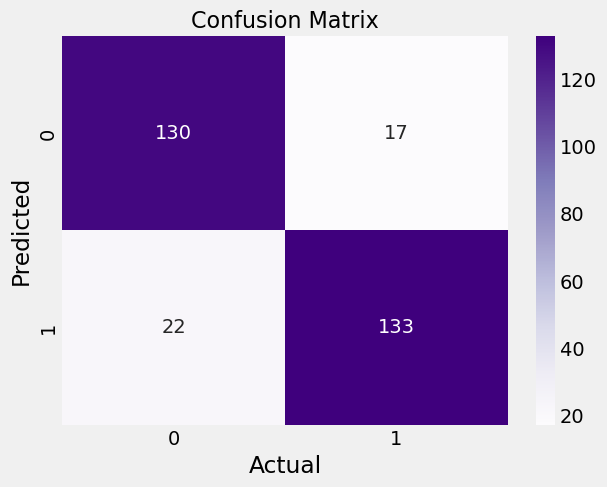

In [72]:
classification_metrics(y_test,y_pred_test)

Class 0 is for non-fraudulent claims and Class 1 is for fraudulent claim.
From the confusion matrix it is clear that:
TP: 130 transaction were classified as not fraudulent claims and in actual they are non fraudulent claims.
FP: 17 transactions were classified as not fraudulent claim but in actual they are fraudulent claim(Type I Error)
FN: 22 transaction were classified as fraudulent claim but in actual they are non fraudulent claim(Type II Error)
TN: 133 transaction were classified as fraudulent claim and in actual they are fraudulent claims

We can observe that the accuracy score, F1 score, precision score, and recall score are all relatively close, indicating consistent performance across these metrics. This suggests that the model is performing well in terms of overall accuracy and the balance between precision and recall.


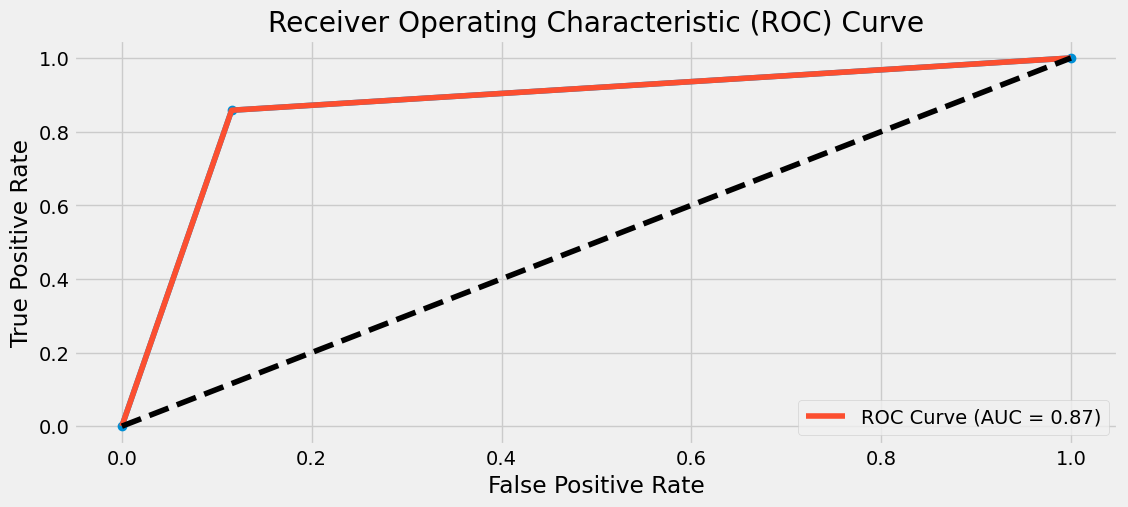

In [73]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc_LR = roc_auc_score(y_test, y_pred_test)
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_LR)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Therefore, an AUC value of 0.87 indicates that the model's predictions are significantly better than random.

Specifically, an AUC value of 0.87 suggests that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance. 
This indicates a strong ability to separate the two classes.

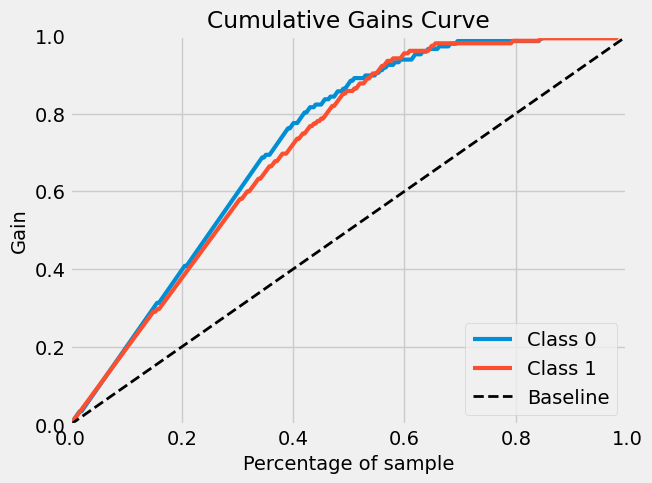

In [74]:
logistic_lift = logreg.predict_proba(x_test)
pcg(y_test, logistic_lift)
plt.show()

In [75]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(logreg, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.71 0.74 0.7  0.73 0.77 0.77 0.79 0.72 0.77 0.79]
Average CV Score:  0.7489999999999999
Number of CV Scores used in Average:  10


### Decision Tree

In [119]:
DTC=DecisionTreeClassifier(max_depth=6,min_samples_leaf=5,min_samples_split=3,criterion='gini')
DTC.fit(x_train,y_train)
y_predDTCTrain=DTC.predict(x_train)
y_predDTC=DTC.predict(x_test)

In [120]:
train_accuracy = DTC.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9144518272425249


In [121]:
clsf_rep_test = classification_report(y_train, y_predDTCTrain)
print("Classification Report of Training Data:")
print(clsf_rep_test)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       606
           1       0.89      0.94      0.92       598

    accuracy                           0.91      1204
   macro avg       0.92      0.91      0.91      1204
weighted avg       0.92      0.91      0.91      1204



In [121]:
test_accuracy = DTC.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8642384105960265


In [122]:
y_pred_test = DTC.predict(x_test)
clsf_rep_test = classification_report(y_test, y_predDTC)
print("Classification Report of Training Data:")
print(clsf_rep_test)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       147
           1       0.83      0.92      0.87       155

    accuracy                           0.86       302
   macro avg       0.87      0.86      0.86       302
weighted avg       0.87      0.86      0.86       302



accuracy score is : 0.8642384105960265
F1 score is : 0.8633016482849226
precision score is : 0.8313953488372093
recall score is : 0.9225806451612903


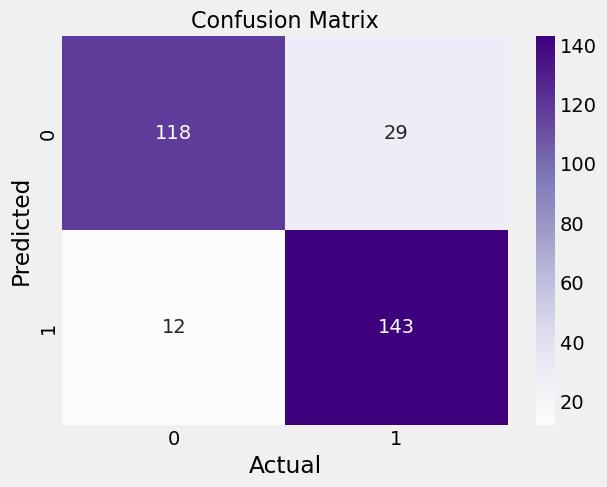

In [123]:
classification_metrics(y_test,y_predDTC)

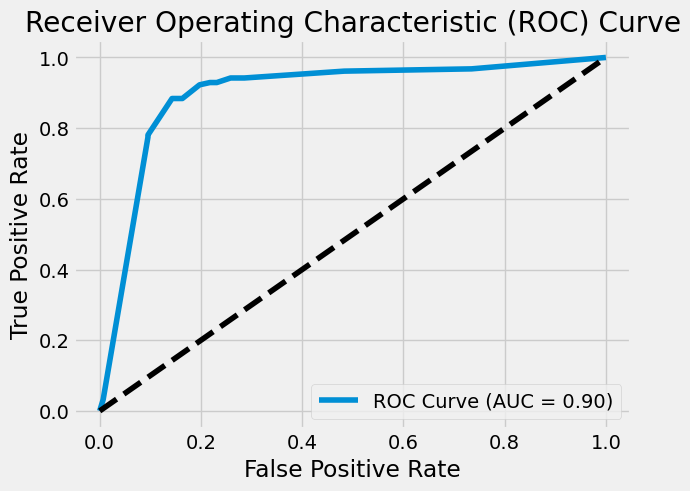

In [122]:
y_pred_prob = DTC.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_DTC = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_DTC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [118]:
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=900)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))

[I 2023-06-29 19:28:25,782] A new study created in memory with name: no-name-6571e1b2-65dd-48b5-ba42-801b127af0d6
[I 2023-06-29 19:28:25,820] Trial 0 finished with value: 0.8211920529801324 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8211920529801324.
[I 2023-06-29 19:28:25,855] Trial 1 finished with value: 0.8245033112582781 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8245033112582781.
[I 2023-06-29 19:28:25,877] Trial 2 finished with value: 0.8543046357615894 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.8543046357615894.
[I 2023-06-29 19:28:25,910] Trial 3 finished with value: 0.847682119205298 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 2 with val

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5}


### Random Forest Model

In [128]:
RFC=RandomForestClassifier(max_depth=10,n_estimators=900,criterion='entropy',min_samples_leaf=2,min_samples_split=2)
RFC.fit(x_train,y_train)
y_predRFCTrain=RFC.predict(x_train)
y_predRFC=RFC.predict(x_test)

In [129]:
train_accuracy = RFC.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9759136212624585


In [130]:
test_accuracy = RFC.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8708609271523179


In [131]:
y_pred_train = RFC.predict(x_train)
clsf_rep_train = classification_report(y_train, y_predRFCTrain)
print("Classification Report of Training Data:")
print(clsf_rep_train)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       606
           1       0.97      0.98      0.98       598

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



In [132]:
y_pred_test = RFC.predict(x_test)
clsf_rep_test = classification_report(y_test, y_predRFC)
print("Classification Report of Training Data:")
print(clsf_rep_test)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       147
           1       0.88      0.87      0.87       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



accuracy score is : 0.8708609271523179
F1 score is : 0.870791508968241
precision score is : 0.8766233766233766
recall score is : 0.8709677419354839


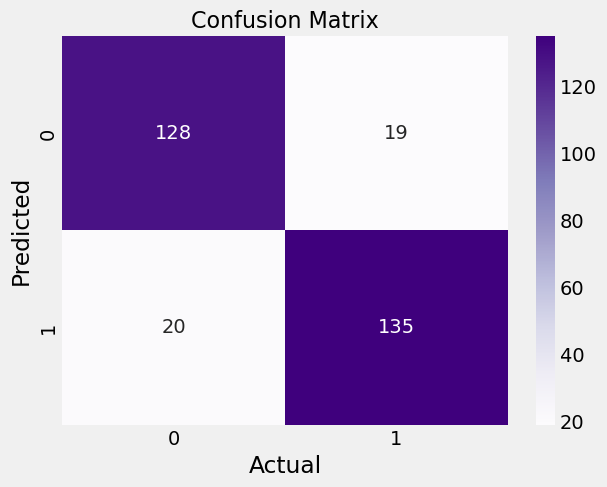

In [133]:
classification_metrics(y_test,y_predRFC) 

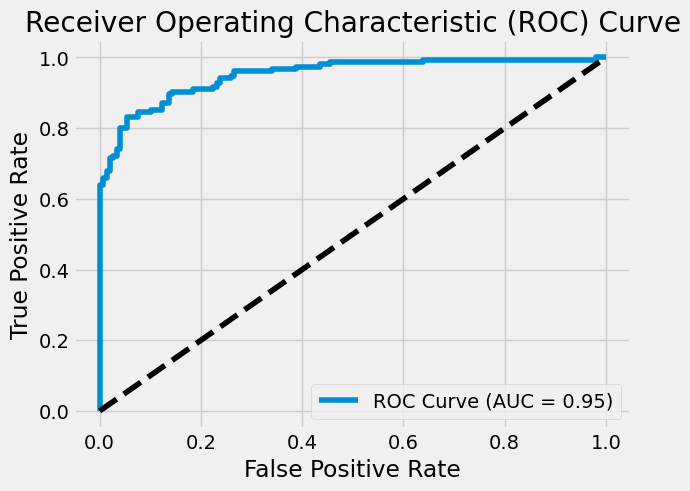

In [135]:
y_pred_prob = RFC.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_RFC = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance

Top 10 Feature Ranking:
1. Feature 70: Importance 0.15367933365312164
2. Feature 71: Importance 0.1063329133667677
3. Feature 14: Importance 0.043937618753172585
4. Feature 11: Importance 0.036944356755446654
5. Feature 13: Importance 0.034886683373447004
6. Feature 12: Importance 0.02814921017512654
7. Feature 44: Importance 0.02634891007851685
8. Feature 85: Importance 0.025965979289546456
9. Feature 78: Importance 0.024819532786905168
10. Feature 73: Importance 0.02283537482372056


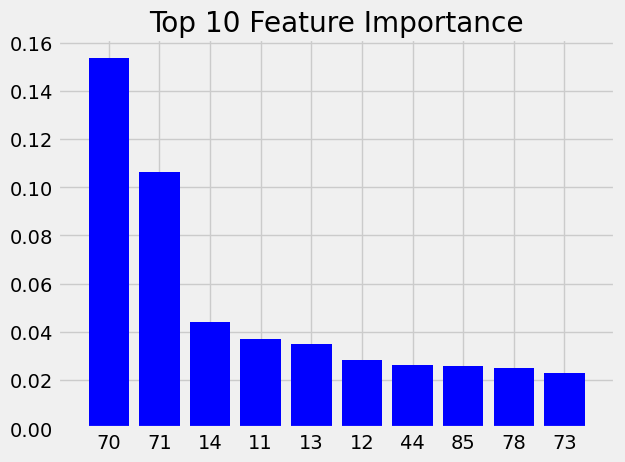

In [107]:
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 Feature Ranking:")
for f in range(10):
    feature_index = indices[f]
    feature_importance = importances[feature_index]
    print(f"{f+1}. Feature {feature_index}: Importance {feature_importance}")

import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

### Applying Optuna for hyper parameter tuning

In [127]:
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))

[I 2023-06-29 22:26:04,269] A new study created in memory with name: no-name-49f1c732-e814-4490-a735-00a9f5eaff77
[I 2023-06-29 22:26:05,111] Trial 0 finished with value: 0.8509933774834437 and parameters: {'criterion': 'gini', 'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8509933774834437.
[I 2023-06-29 22:26:07,443] Trial 1 finished with value: 0.8509933774834437 and parameters: {'criterion': 'gini', 'n_estimators': 700, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8509933774834437.
[I 2023-06-29 22:26:10,046] Trial 2 finished with value: 0.8509933774834437 and parameters: {'criterion': 'entropy', 'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8509933774834437.
[I 2023-06-29 22:26:11,615] Trial 3 finished with value: 0.8576158940397351 and parameters: {'criterion': 'entropy', 'n_estimators': 400, 'm

Best hyperparameters: {'criterion': 'entropy', 'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}


### AdaBoost

In [139]:
ADAC=AdaBoostClassifier(n_estimators=400,learning_rate= 0.24)
ADAC.fit(x_train,y_train)
y_predADACTrain=ADAC.predict(x_train)
y_predADAC=ADAC.predict(x_test)

In [140]:
train_accuracy = ADAC.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9210963455149501


In [141]:
test_accuracy = ADAC.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8642384105960265


In [142]:
y_pred_test = ADAC.predict(x_test)
clsf_rep_test = classification_report(y_test, y_pred_test)
print("Classification Report of Training Data:")
print(clsf_rep_test)

Classification Report of Training Data:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       147
           1       0.87      0.87      0.87       155

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



accuracy score is : 0.8642384105960265
F1 score is : 0.8641177309790063
precision score is : 0.8653846153846154
recall score is : 0.8709677419354839


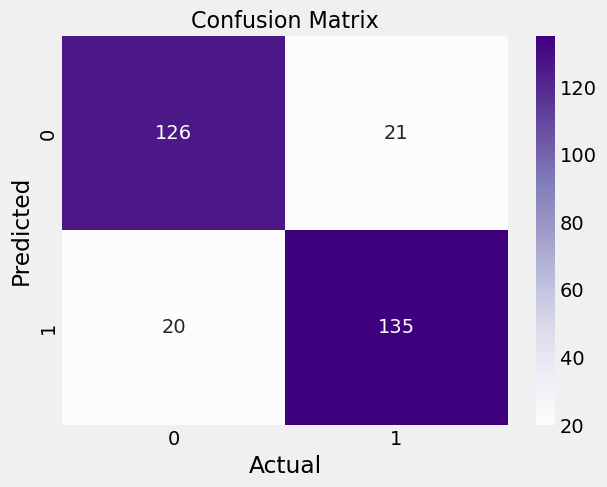

In [143]:
classification_metrics(y_test,y_predADAC)

In [144]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)

    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42,
    )

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))

[I 2023-07-02 00:10:34,582] A new study created in memory with name: no-name-e55d15bc-e472-4ca5-9b6b-2f560827d6be
[I 2023-07-02 00:10:36,029] Trial 0 finished with value: 0.8576158940397351 and parameters: {'n_estimators': 350, 'learning_rate': 0.2041148248905287}. Best is trial 0 with value: 0.8576158940397351.
[I 2023-07-02 00:10:36,680] Trial 1 finished with value: 0.8178807947019867 and parameters: {'n_estimators': 150, 'learning_rate': 0.01043383966397933}. Best is trial 0 with value: 0.8576158940397351.
[I 2023-07-02 00:10:36,905] Trial 2 finished with value: 0.8443708609271523 and parameters: {'n_estimators': 50, 'learning_rate': 0.0791157943972269}. Best is trial 0 with value: 0.8576158940397351.
[I 2023-07-02 00:10:37,567] Trial 3 finished with value: 0.8443708609271523 and parameters: {'n_estimators': 150, 'learning_rate': 0.020952159167652435}. Best is trial 0 with value: 0.8576158940397351.
[I 2023-07-02 00:10:38,432] Trial 4 finished with value: 0.8576158940397351 and para

Best hyperparameters: {'n_estimators': 500, 'learning_rate': 0.4030114752370783}


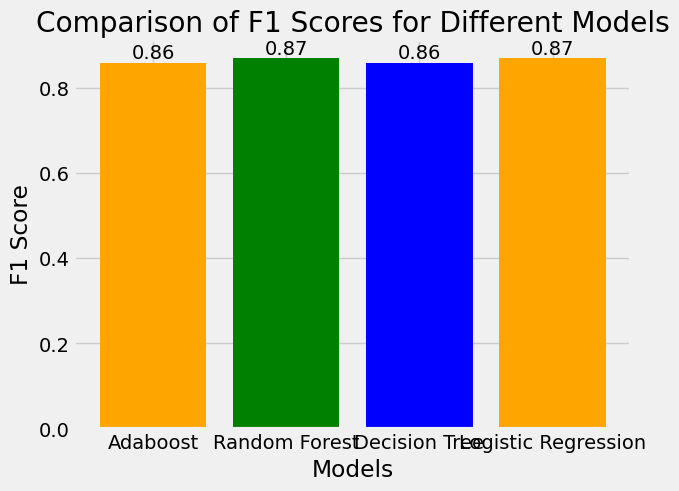

In [147]:
f1_scores = [0.86, 0.87,0.86,0.87]
model_labels = ['Adaboost', 'Random Forest','Decision Tree','Logistic Regression']
x_ticks = range(len(model_labels))
colors = ['orange', 'green', 'blue']

plt.bar(x_ticks, f1_scores, color=colors)

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.xticks(x_ticks, model_labels)

for i, score in enumerate(f1_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
plt.show()